# Importing Modules

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [18]:
path = r'C:\Users\david\Desktop\Achievement 6'

In [22]:
df = pd.read_csv(os.path.join(path, 'Original Data', 'kc_house_data.csv'))

In [28]:
pd.set_option('display.max_columns', None)

In [110]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
# Removing categorical data:
df_quantitative = df
df_quantitative = df.drop(['id', 'date', 'waterfront', 'view', 'yr_built', 'yr_renovated', 'zipcode'], axis = 1)

In [34]:
df_quantitative.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,47.6168,-122.045,1800,7503


# Elbow Technique

In [37]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [41]:
score = [kmeans[i].fit(df_quantitative).score(df_quantitative) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\david\anaconda3\Lib\site-packages\sklearn\clust

[-2966155155540087.0,
 -1408139305048336.5,
 -783159630750937.2,
 -513547793427707.5,
 -376989368877691.75,
 -290243058281060.1,
 -231784808557949.16,
 -188348428641754.62,
 -163266449605749.3]

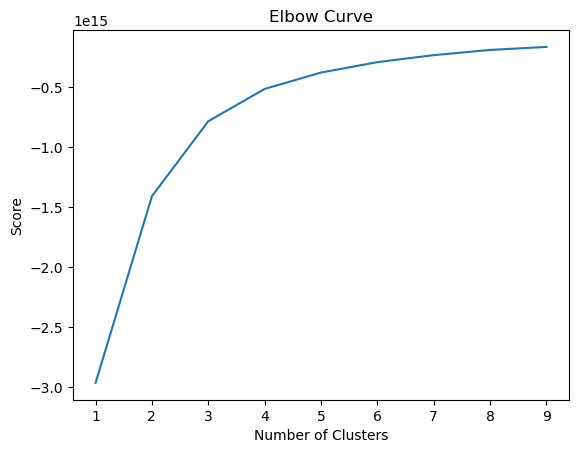

In [76]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Score evens out around 4 clusters, indicating that is the appropriate number for the model

# K-Means Clustering

In [79]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [80]:
# Fit the k-means object to the data.

kmeans.fit(df_quantitative)

C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [81]:
df_quantitative['clusters'] = kmeans.fit_predict(df_quantitative)

C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [82]:
df_quantitative.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,clusters
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,47.5112,-122.257,1340,5650,1
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,47.7210,-122.319,1690,7639,2
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,47.7379,-122.233,2720,8062,1
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,47.5208,-122.393,1360,5000,2
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,47.6168,-122.045,1800,7503,1


In [83]:
df_quantitative['clusters'].value_counts()

clusters
1    12933
2     7261
0     1229
3      190
Name: count, dtype: int64

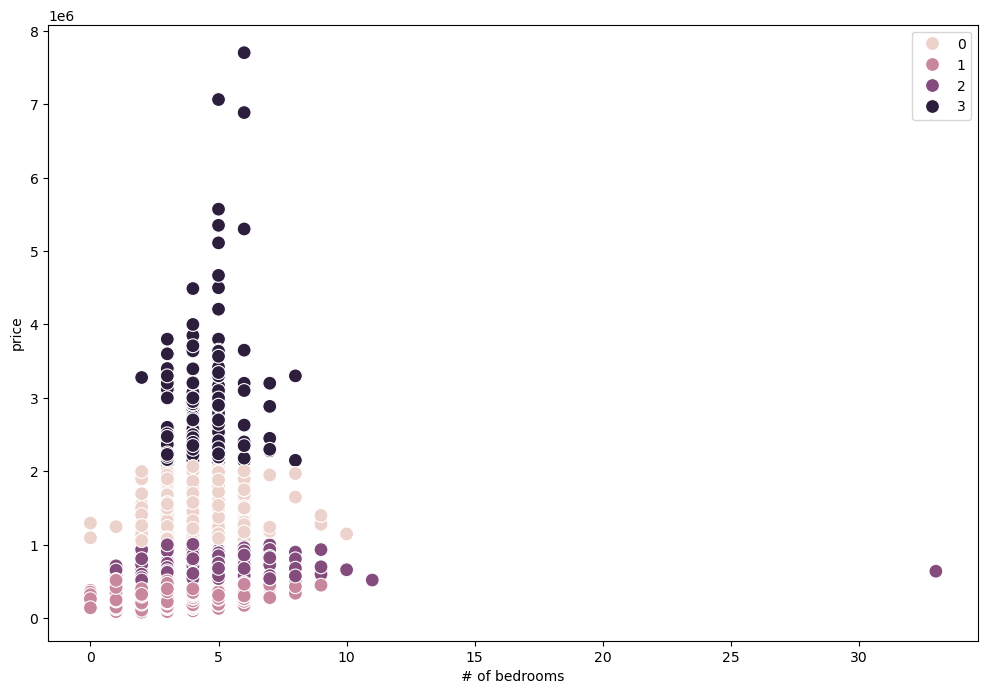

In [84]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bedrooms'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('# of bedrooms') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

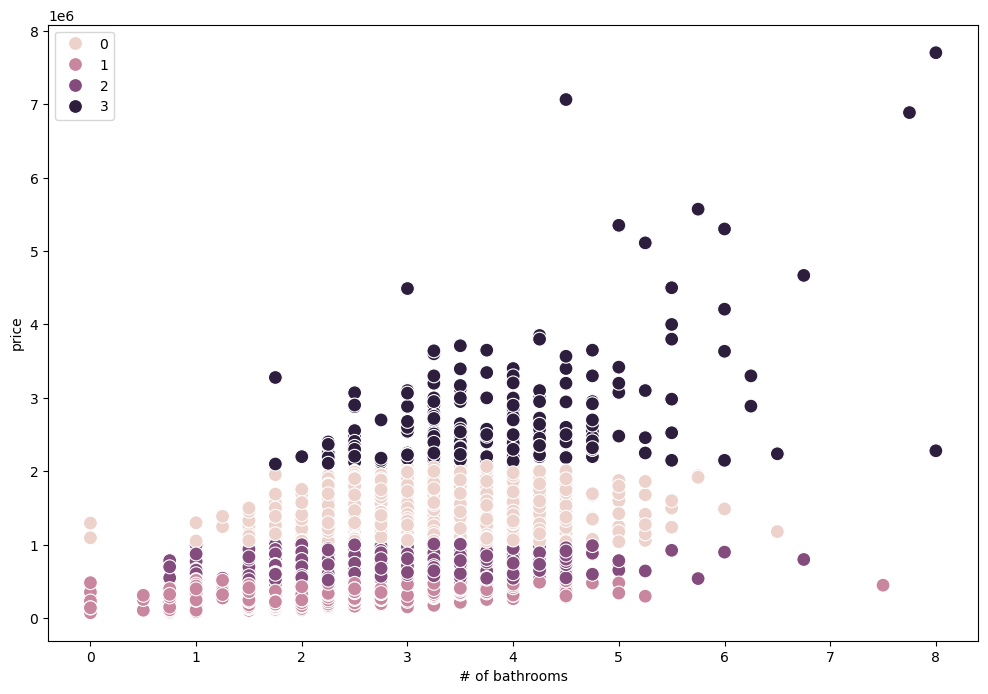

In [85]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bathrooms'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('# of bathrooms') 
plt.ylabel('price') 
plt.show()

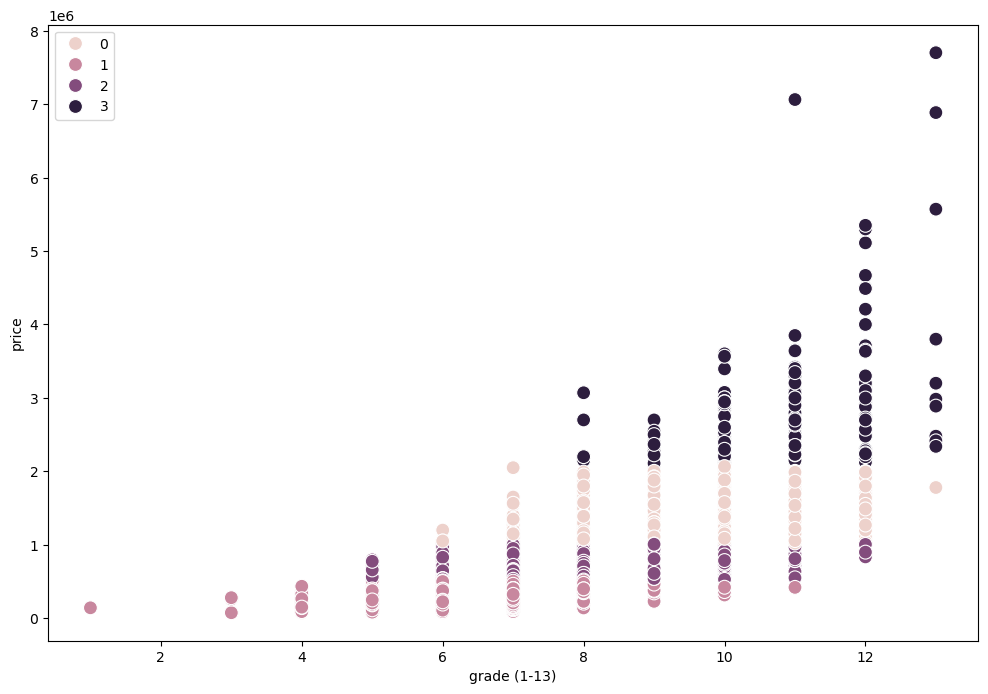

In [100]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['grade'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('grade (1-13)') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

In [96]:
df['grade'].max()

13

In [98]:
df['grade'].min()

1

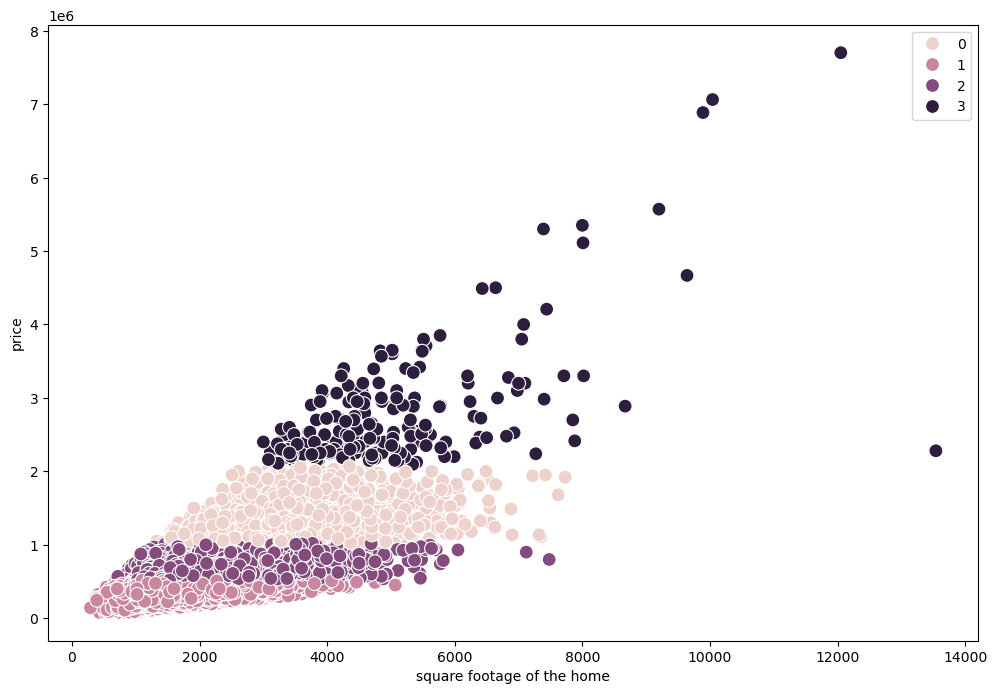

In [102]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('square footage of the home') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

In [104]:
df_quantitative.loc[df_quantitative['clusters'] == 3, 'cluster'] = 'Dark Purple'
df_quantitative.loc[df_quantitative['clusters'] == 2, 'cluster'] = 'Purple'
df_quantitative.loc[df_quantitative['clusters'] == 1, 'cluster'] = 'Pink'
df_quantitative.loc[df_quantitative['clusters'] == 0, 'cluster'] = 'Light pink'

# Descriptive Statistics

In [112]:
df_quantitative.groupby('cluster').agg({'bedrooms':['mean', 'median'], 
                         'bathrooms':['mean', 'median'], 
                         'grade':['mean', 'median'],
                          'sqft_living':['mean', 'median'],
                          'price':['mean', 'median']})

bedrooms        bathrooms        grade        sqft_living          \
                mean median      mean median  mean median        mean  median   
cluster                                                                         
Dark Purple     4.35   4.00      3.87   3.75 10.75  11.00     5094.15 4730.00   
Light pink      4.03   4.00      3.07   3.00  9.64  10.00     3632.03 3530.00   
Pink            3.16   3.00      1.86   1.75  7.13   7.00     1676.97 1600.00   
Purple          3.61   4.00      2.36   2.50  8.19   8.00     2455.99 2400.00   

                 price             
                  mean     median  
cluster                            
Dark Purple 2806108.84 2528500.00  
Light pink  1358833.10 1295000.00  
Pink         345232.92  345000.00  
Purple       689279.86  660000.00

Analysis:
Dark purple and light pink clusters represent the most expensive homes. They both have a higher median grade than pink and purple. They also both have a larger median square footage of living space than pink and purple.
All four clusters had a similar median for number of bedrooms, but their respective prices differed quite a bit. This suggests that the number of bedrooms is not a strong indicator of the price of the home.

In summary, the larger homes that are graded favorably appear to have a higher than average price. This warrants further investigation.